# Feature Encoding or converting non-numerical values to numerical values

In [3]:
import pandas as pd
import numpy as np

In [4]:
cars = pd.read_csv("car-sales.csv")
cars.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [14]:
print(len(cars))
cars.isnull().sum()

1000


Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [4]:
np.unique(cars["Make"])

array(['BMW', 'Honda', 'Nissan', 'Toyota'], dtype=object)

In [5]:
np.unique(cars.Colour)

array(['Black', 'Blue', 'Green', 'Red', 'White'], dtype=object)

In [6]:
cars.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

#### observation

It can be seen that both `Make` and `Colour` columns have categorical values. We need to convert this data into numeric value. Otherwise, we can't fit our model

## Solution-1

```py
from sklearn.preprocessing import OneHotEncoder
```

In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [8]:
categorical_features = ["Make", "Colour", "Doors"]

#### why `Doors`? It is already in numeric form

In [8]:
cars["Doors"].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

Though the `Doors` column is in numerical but it's also categorical

In [9]:
X = cars.drop("Price", axis=1)
y = cars["Price"]

In [10]:
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)],
                                remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [17]:
X.head(2)

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5


In [12]:
pd.DataFrame(transformed_X).head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0


In [13]:
X.head(2)

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5


In [11]:
cars.columns

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype='object')

So 12 columns are created from 3 columns and the 13th column is the `Odometer (KM)` column. Let's do some calculation

In [25]:
col_1 = len(np.unique(X['Make']))
col_2 = len(np.unique(X['Colour']))
col_3 = len(np.unique(X['Doors']))
print(f"unique Make: {col_1} + unique Colour: {col_2} + unique Doors: {col_3} = {col_1+col_2+col_3}")

unique Make: 4 + unique Colour: 5 + unique Doors: 3 = 12


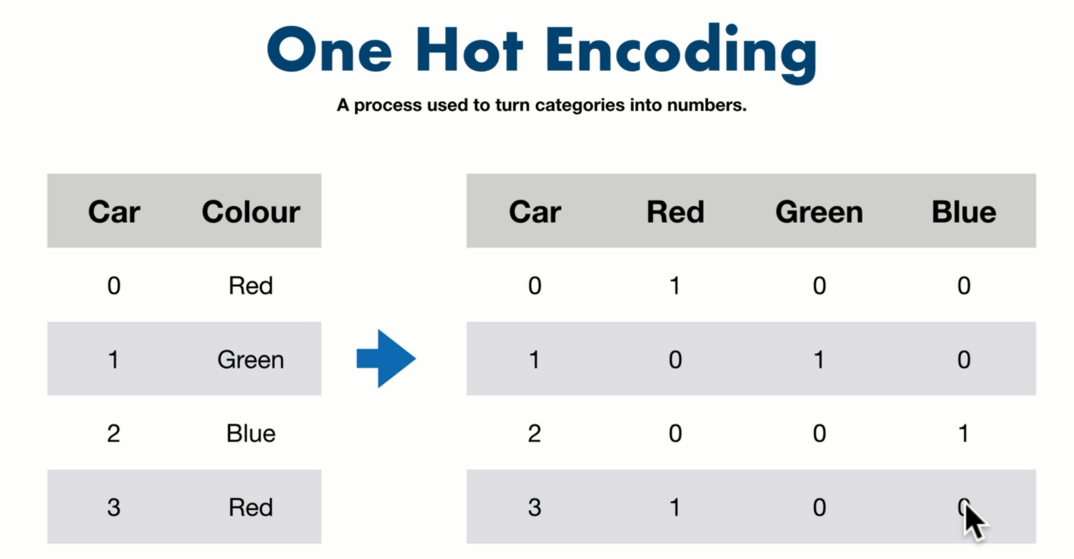

In [17]:
pd.DataFrame(transformed_X).dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
dtype: object

We have successfully converted all `object` columns into numeric column

## Solution-2

using `pandas` `get_dummies()` method

In [18]:
cars.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [19]:
dummies = pd.get_dummies(data=cars[["Make", "Colour", "Doors"]])
dummies.head()

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0


#### observation

`get_dummies()` didn't work for numeric column `Doors`

### Now fit the model

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    shuffle=True,
                                                    random_state=42,
                                                    test_size=0.2)

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.31188636171441997

In [24]:
# try with dummies
X_train, X_test, y_train, y_test = train_test_split(dummies,
                                                    y,
                                                    shuffle=True,
                                                    random_state=42,
                                                    test_size=0.2)

In [25]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.2895999983642509

#### observation

The score is very low. One possible reason is there are only 4 feature to predict price. So for better performance, the model needs more features